In [14]:
from vanilla_option import vanilla_option
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')


# INPUTS
S = 100
K = 100
K_low = 90
K_high = 110
K_mid = 100
T = 1/12
r = 0.01
q = 0.03
sd = 0.15
option_type = 'Call'

(0.5, 1.574995)

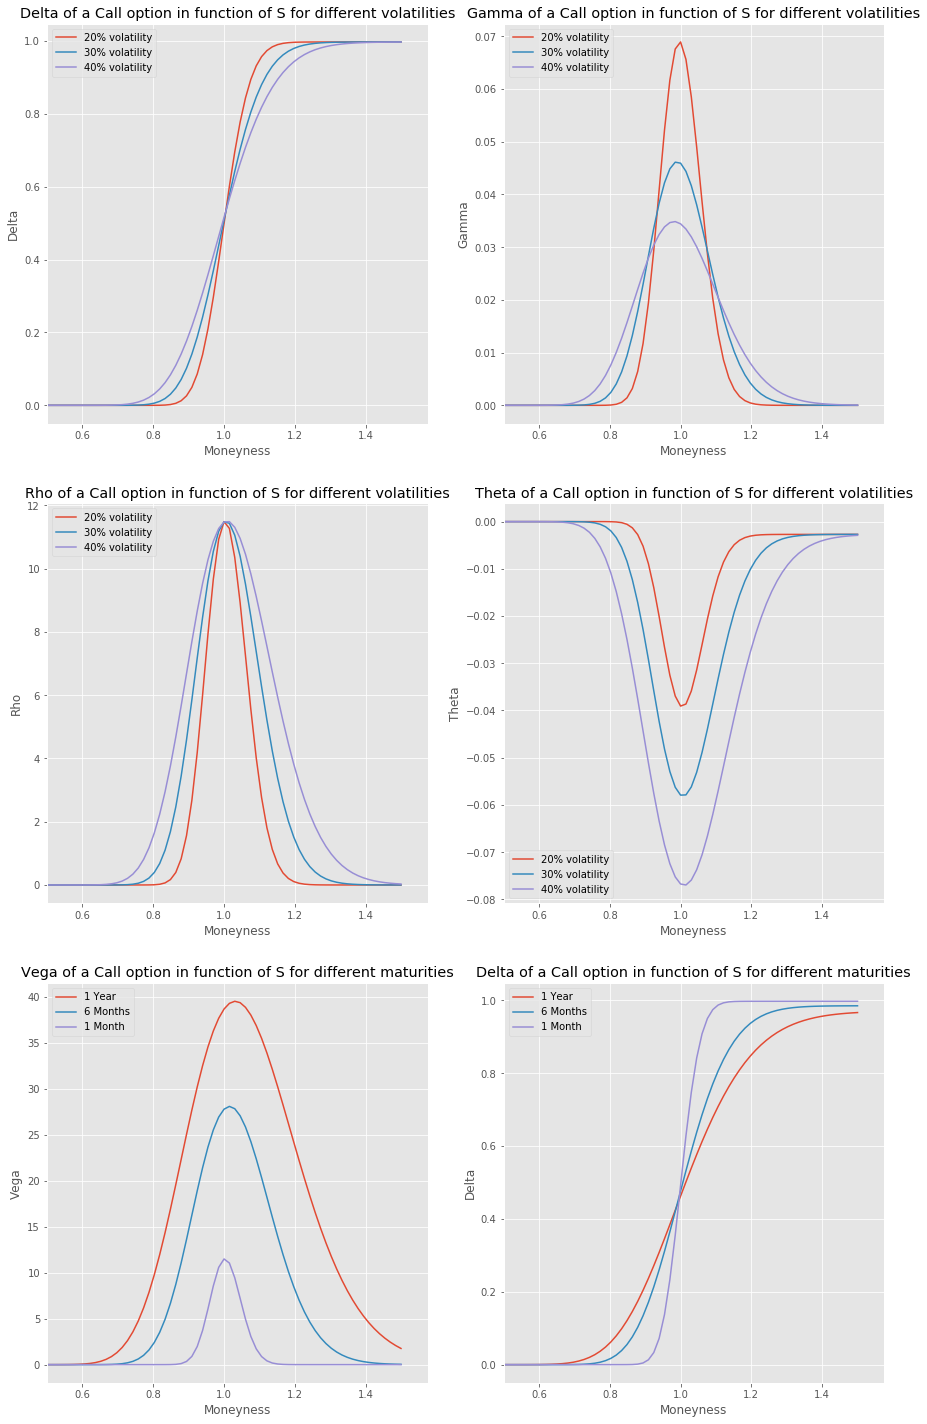

In [15]:
# Greeks of Vanilla Options

plt.rcParams['figure.figsize'] = [15, 25] # Adjust size of output

spots = list(np.linspace(start = 0.01, stop = 1.5*S, num = 100))
moneyness = [spot / K for spot in spots]

inputsdf = pd.DataFrame({'Name': ['Type', 'Spot', 'K', 'Vola', 'T', 'r', 'q'],
                         'Values': [option_type, S, K, str(sd*100)+'%', str(T)+' Year', str(r*100)+'%', str(q*100)+'%',]})
inputsdf


# Delta for different volatilities
plt.subplot(3, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_delta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_delta() for spot in spots], label = '30% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.4, option_type).bs_delta() for spot in spots], label = '40% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.5)


# Gamma for different volatilities
plt.subplot(3, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_gamma() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_gamma() for spot in spots], label = '30% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.4, option_type).bs_gamma() for spot in spots], label = '40% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Gamma of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.5)


# Rho for different volatilities
plt.subplot(3, 2, 3)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_vega() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_vega() for spot in spots], label = '30% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.4, option_type).bs_vega() for spot in spots], label = '40% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Rho')
plt.legend(loc = 'upper left')
plt.title('Rho of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.5)


# Theta for different volatilities
plt.subplot(3, 2, 4)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_theta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_theta() for spot in spots], label = '30% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.4, option_type).bs_theta() for spot in spots], label = '40% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Theta')
plt.legend(loc = 'lower left')
plt.title('Theta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.5)


# Vega for different maturities
plt.subplot(3, 2, 5)
plt.plot(moneyness, [vanilla_option(spot, K, 1, r, q, sd, option_type).bs_vega() for spot in spots], label = '1 Year')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_vega() for spot in spots], label = '6 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_vega() for spot in spots], label = '1 Month')
plt.xlabel('Moneyness')
plt.ylabel('Vega')
plt.legend(loc = 'upper left')
plt.title('Vega of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.5)


# Delta for different maturities
plt.subplot(3, 2, 6)
plt.plot(moneyness, [vanilla_option(spot, K, 1, r, q, sd, option_type).bs_delta() for spot in spots], label = '1 Year')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '6 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '1 Month')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.5)